## What is ABC news telling us for the 14 past years?

***Francisca Dias***

## Table of Contents

* [Introduction](#Introduction)


* [Libraries](#Libraries)


* [Data Manipulation](#DataManipulation)


* [Articles per year](#Articlesperyear)


* [CountVectorizer](#CountVectorizer)


* [Guess the most frequent words](#Guessthemostfrequentwords)


* [Topic Modelling](#TopicModelling)


## <a id='introduction'>Introduction</a>

This dataset contains data of news headlines published over a period of 14 years from the reputable Australian news source ABC (Australian Broadcasting Corp.).

The news were taken from 2003 till 2017.

The number of articles varies each year, and in 2013 we have over 80,000 articles.

The most frequent words appear to be related to some sort of tragedy, where words such as police, death and crime are pretty common.

I end this article by doing topic modeling.

**Note**:This dataset was taken from Kaggle.com and prepared by Rohit Kulkarni.

## <a id='Libraries'>Libraries</a>

In [1]:
import numpy as np 
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import LatentDirichletAllocation

import warnings
warnings.filterwarnings('ignore')

## <a id='DataManipulation'>Data Manipulation</a>

In [2]:
df = pd.read_csv("/Users/FranciscaDias/Desktop/Kaggle_Competions/2.ABC_News/abcnews-date-text.csv")
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [3]:
df.dtypes

publish_date      int64
headline_text    object
dtype: object

In [4]:
df["year"] = df["publish_date"].astype(str).str[:4].astype(np.int64)
df.head()

,publish_date,headline_text,year
0,20030219,aba decides against community broadcasting lic...,2003
1,20030219,act fire witnesses must be aware of defamation,2003
2,20030219,a g calls for infrastructure protection summit,2003
3,20030219,air nz staff in aust strike for pay rise,2003
4,20030219,air nz strike to affect australian travellers,2003


In [5]:
df["month"] = df["publish_date"].astype(str).str[4:6].astype(np.int64)
df.head()

,publish_date,headline_text,year,month
0,20030219,aba decides against community broadcasting lic...,2003,2
1,20030219,act fire witnesses must be aware of defamation,2003,2
2,20030219,a g calls for infrastructure protection summit,2003,2
3,20030219,air nz staff in aust strike for pay rise,2003,2
4,20030219,air nz strike to affect australian travellers,2003,2


In [6]:
df.year.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017])

In [7]:
df.month.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1])

In [8]:
df["word_count"] = df["headline_text"].str.len()
df.head()

,publish_date,headline_text,year,month,word_count
0,20030219,aba decides against community broadcasting lic...,2003,2,50
1,20030219,act fire witnesses must be aware of defamation,2003,2,46
2,20030219,a g calls for infrastructure protection summit,2003,2,46
3,20030219,air nz staff in aust strike for pay rise,2003,2,40
4,20030219,air nz strike to affect australian travellers,2003,2,45


## <a id='Articlesperyear'>Articles per year</a>

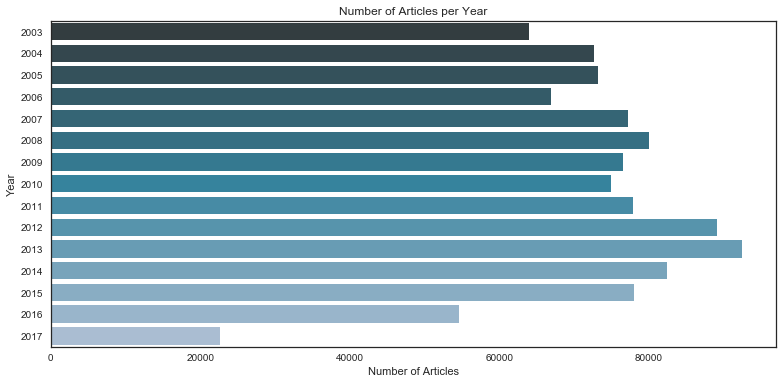

In [26]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(13,6))
ax= sns.countplot(y="year",data=df,  palette="PuBuGn_d")
ax.set(xlabel='Number of Articles', ylabel='Year')
plt.title("Number of Articles per Year");

## <a id='CountVectorizer'>CountVectorizer</a>

In [10]:
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = "english",   
                             max_features = 30)

news_array = vectorizer.fit_transform(df["headline_text"])

# Numpy arrays are easy to work with, so convert the result to an array
news_array = news_array.toarray()

# Lets take a look at the words in the vocabulary and  print the counts of each word in the vocabulary:
vocab = vectorizer.get_feature_names()

# Sum up the counts of each vocabulary word
dist = np.sum(news_array, axis=0)

# For each, print the vocabulary word and the number of times it appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

12137 australia
9926 australian
8212 calls
8520 car
9968 charged
8211 coast
16225 council
16017 court
11019 crash
8595 day
10925 death
16915 govt
10199 health
8669 hospital
14868 interview
27627 man
9007 murder
28470 new
12610 nsw
12197 plan
35420 police
11632 qld
9441 report
8896 sa
19340 says
10409 sydney
11192 wa
11772 water
8161 win
8109 woman


## <a id='Guessthemostfrequentwords'>Guess the most frequent words</a>

"Police" seems to be the most frequent word on the dataset.

It is interesting to see that the top words are pretty much related to tragedy: crash, hospital, murder. 

Maybe ABC news consumers are drawn to this category of news.

## <a id='TopicModelling'>Topic Modelling</a>

In [28]:
all_words = df.headline_text
vect = CountVectorizer(stop_words = "english")
vect.fit(all_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [29]:
print(len(vect.vocabulary_))

95709


In [30]:
bag_of_words = vect.transform(all_words)

In [31]:
lda = LatentDirichletAllocation(n_topics=10, learning_method="batch",
                                max_iter=25, random_state=0)
# be build the model and transform the data in one step
# computing transform takes some time,
# and we can save time by doing both at once.
document_topics = lda.fit_transform(bag_of_words)

/Users/FranciscaDias/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [32]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 95709)


In [33]:
# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names())

In [34]:
# Print out the 10 topics:
import mglearn
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
police        govt          workers       crash         australia     
court         nsw           union         dies          day           
man           wa            pay           car           win           
death         health        interview     road          world         
claims        government    action        hospital      cup           
child         election      says          study         open          
drug          labor         future        driver        final         
sex           pm            farm          power         test          
missing       qld           job           injured       lead          
face          says          green         new           tour          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
coun